In [4]:
# Importing necessary libraries
import pandas as pd

# Define the path to the data file
file_path = 'C:\\Users\\vishn\\Downloads\\fairface_label_train (1).csv'  # Replace with the actual path to your file

# Reading the data file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the data:")
display(data.head())

# Display summary information about the DataFrame
print("\nSummary of the data:")
data.info()


First few rows of the data:


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True



Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          86744 non-null  object
 1   age           86744 non-null  object
 2   gender        86744 non-null  object
 3   race          86744 non-null  object
 4   service_test  86744 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 2.7+ MB


In [5]:
# Checking the unique classes and their counts for gender, age, and race
columns_to_check = ['gender', 'age', 'race']

for column in columns_to_check:
    print(f"Classes and counts in '{column}':")
    print(data[column].value_counts())
    print("-" * 40)

# Optional: Display the unique classes for quick inspection
for column in columns_to_check:
    print(f"Unique classes in '{column}': {sorted(data[column].unique())}")
    print("-" * 40)


Classes and counts in 'gender':
gender
Male      45986
Female    40758
Name: count, dtype: int64
----------------------------------------
Classes and counts in 'age':
age
20-29           25598
30-39           19250
40-49           10744
3-9             10408
10-19            9103
50-59            6228
60-69            2779
0-2              1792
more than 70      842
Name: count, dtype: int64
----------------------------------------
Classes and counts in 'race':
race
White              16527
Latino_Hispanic    13367
Indian             12319
East Asian         12287
Black              12233
Southeast Asian    10795
Middle Eastern      9216
Name: count, dtype: int64
----------------------------------------
Unique classes in 'gender': ['Female', 'Male']
----------------------------------------
Unique classes in 'age': ['0-2', '10-19', '20-29', '3-9', '30-39', '40-49', '50-59', '60-69', 'more than 70']
----------------------------------------
Unique classes in 'race': ['Black', 'East Asian'

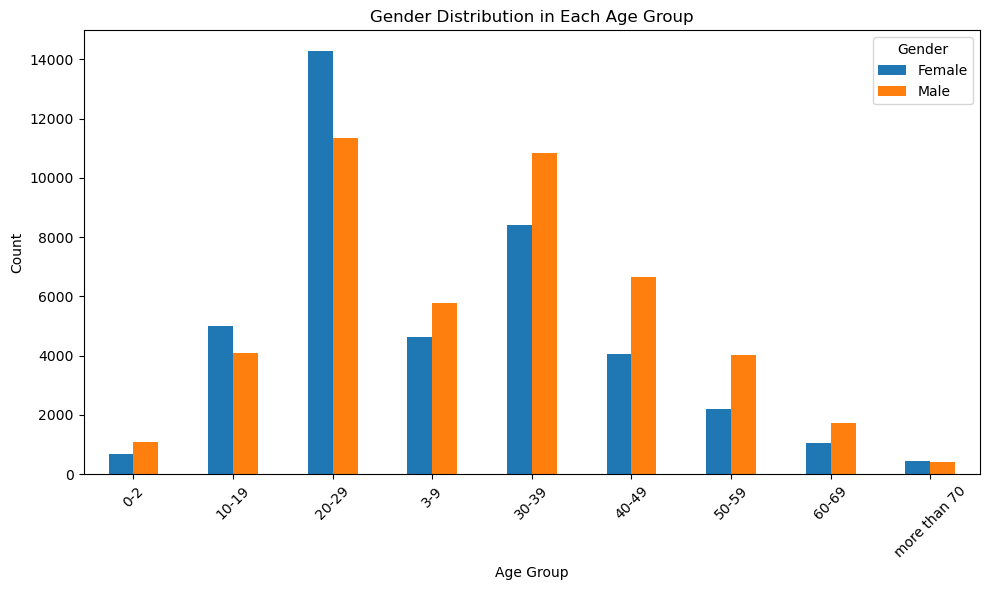

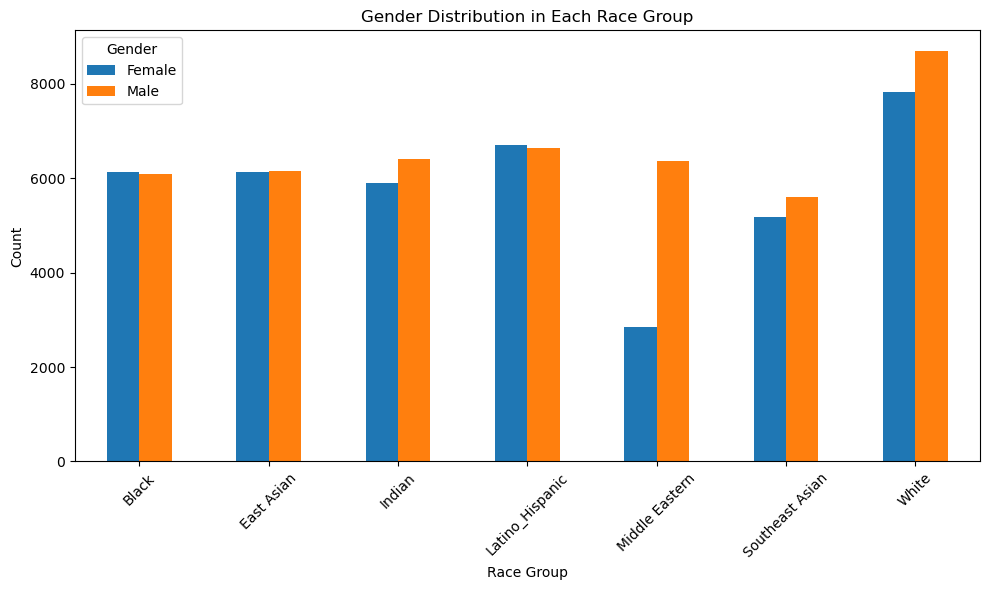

In [8]:
import matplotlib.pyplot as plt

# Plotting gender distribution within each age group
age_group_data = data.groupby(['age', 'gender']).size().unstack(fill_value=0)

# Bar plot for age groups
age_group_data.plot(
    kind='bar',
    figsize=(10, 6),
    title='Gender Distribution in Each Age Group',
    xlabel='Age Group',
    ylabel='Count',
    rot=45
)
plt.legend(title='Gender')
plt.tight_layout()  # Correct function
plt.show()

# Plotting gender distribution within each race group
race_group_data = data.groupby(['race', 'gender']).size().unstack(fill_value=0)

# Bar plot for race groups
race_group_data.plot(
    kind='bar',
    figsize=(10, 6),
    title='Gender Distribution in Each Race Group',
    xlabel='Race Group',
    ylabel='Count',
    rot=45
)
plt.legend(title='Gender')
plt.tight_layout()  # Correct function
plt.show()


In [18]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\vishn\Downloads\fairface_label_train (1).csv"
data = pd.read_csv(file_path)

# Target total sample size
target_sample_size = 10000

# Determine the number of unique combinations of gender, race, and age
unique_combinations = data.groupby(['gender', 'race', 'age']).ngroups

# Calculate target samples per group
samples_per_group = target_sample_size // unique_combinations

print(f"Target samples per group: {samples_per_group}")

# Prepare the balanced dataset
balanced_samples = []

# Loop through each combination of gender, race, and age
grouped_data = data.groupby(['gender', 'race', 'age'])
for (gender, race, age), group in grouped_data:
    # Randomly sample from each group
    sampled_group = group.sample(
        n=min(len(group), samples_per_group),
        random_state=42,  # Ensures reproducibility
        replace=False
    )
    balanced_samples.append(sampled_group)

# Combine all sampled groups into a single DataFrame
balanced_data = pd.concat(balanced_samples, ignore_index=True)

# If the dataset size is still less than the target, sample additional records from larger groups
if len(balanced_data) < target_sample_size:
    additional_needed = target_sample_size - len(balanced_data)
    # Sort groups by size and sample additional records proportionally
    additional_samples = data.sample(n=additional_needed, random_state=42, replace=False)
    balanced_data = pd.concat([balanced_data, additional_samples], ignore_index=True)

# Save the new dataset
balanced_data_path = r"C:\Users\vishn\Downloads\new_balanced_data_10k.csv"
balanced_data.to_csv(balanced_data_path, index=False)

# Check the new dataset size
print(f"Final balanced dataset size: {len(balanced_data)}")

# Display the first few rows of the dataset
balanced_data.head()


Target samples per group: 79
Final balanced dataset size: 10000


,file,age,gender,race,service_test
0,train/42288.jpg,0-2,Female,Black,False
1,train/21191.jpg,0-2,Female,Black,True
2,train/56271.jpg,0-2,Female,Black,True
3,train/84449.jpg,0-2,Female,Black,False
4,train/19.jpg,0-2,Female,Black,False


First few rows of the balanced dataset:
              file  age  gender   race  service_test
0  train/42288.jpg  0-2  Female  Black         False
1  train/21191.jpg  0-2  Female  Black          True
2  train/56271.jpg  0-2  Female  Black          True
3  train/84449.jpg  0-2  Female  Black         False
4     train/19.jpg  0-2  Female  Black         False


<Figure size 1000x600 with 0 Axes>

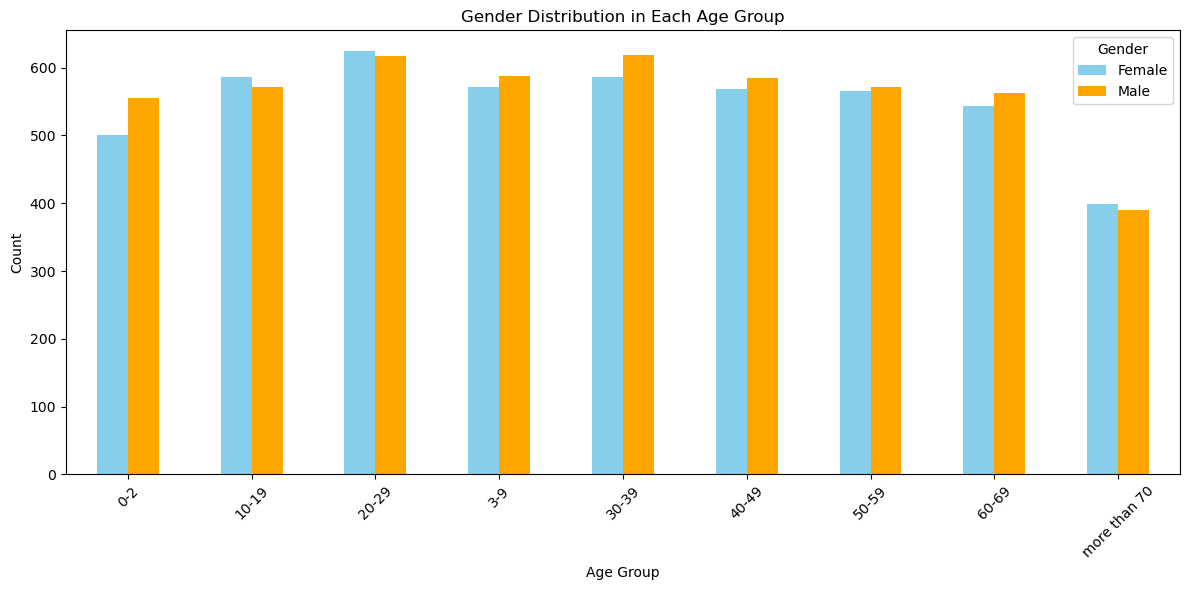

<Figure size 1000x600 with 0 Axes>

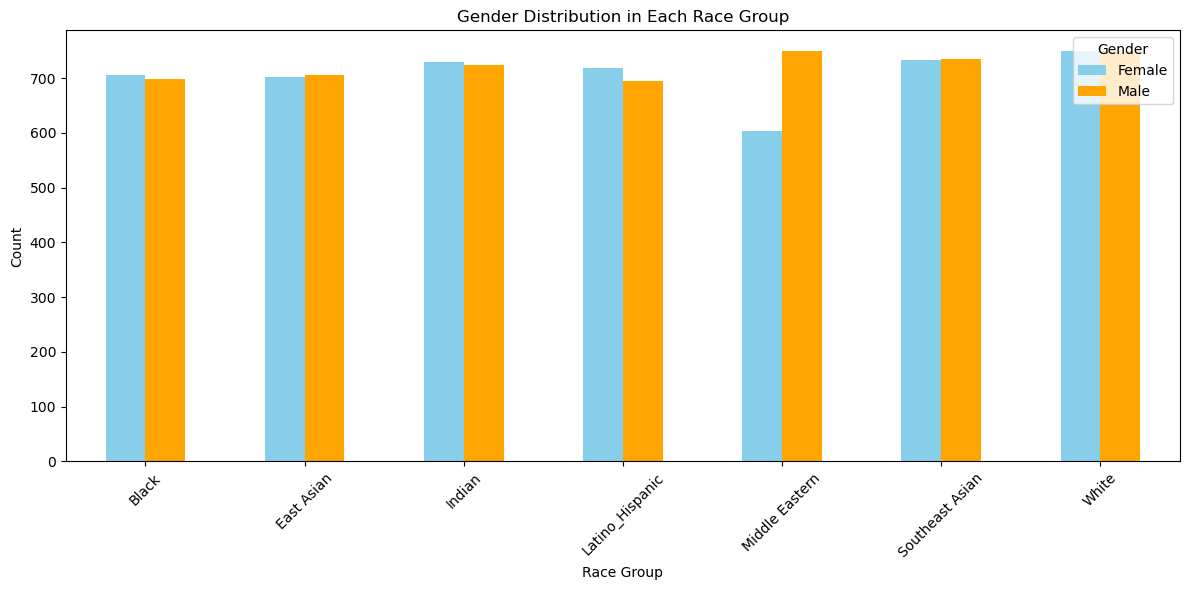

In [19]:
# Load the balanced dataset from the specified path
balanced_data_path = r"C:\Users\vishn\Downloads\new_balanced_data_10k.csv"
balanced_data = pd.read_csv(balanced_data_path)

# Display the first few rows of the balanced dataset
print("First few rows of the balanced dataset:")
print(balanced_data.head())

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Gender distribution in each age group
age_gender_data = balanced_data.groupby(['age', 'gender']).size().unstack(fill_value=0)

# Bar plot for gender distribution in each age group
plt.figure(figsize=(10, 6))
age_gender_data.plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'orange'],
    title='Gender Distribution in Each Age Group',
    xlabel='Age Group',
    ylabel='Count',
    rot=45
)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Gender distribution in each race group
race_gender_data = balanced_data.groupby(['race', 'gender']).size().unstack(fill_value=0)

# Bar plot for gender distribution in each race group
plt.figure(figsize=(10, 6))
race_gender_data.plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'orange'],
    title='Gender Distribution in Each Race Group',
    xlabel='Race Group',
    ylabel='Count',
    rot=45
)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [21]:
# Find the number of rows in the dataset
number_of_rows = balanced_data.shape[0]  # .shape returns (rows, columns), so [0] gives the row count

# Or alternatively, you can use:
number_of_rows_alt = len(balanced_data)

print(f"Number of rows in the dataset: {number_of_rows}")


Number of rows in the dataset: 10000


In [26]:
import os
import shutil
import pandas as pd

# File paths
csv_file_path = r"C:\Users\vishn\Downloads\new_balanced_data_10k.csv"  # CSV file
images_folder = r"V:\train"  # Source images folder
training_images_folder = r"V:\Training Set"  # Destination folder for training images

# Load the CSV file
data = pd.read_csv(csv_file_path)

# Extract file numbers from the 'file' column
# Assuming the format is 'train/42288.jpg', extract just the number (42288)
file_numbers = data['file'].str.extract(r'train/(\d+)\.jpg')[0]

# Ensure the training images folder exists
os.makedirs(training_images_folder, exist_ok=True)

# List of files in the images folder
available_files = set(os.listdir(images_folder))

# Copy the matching files from the source folder to the training images folder
missing_files = []
for file_number in file_numbers:
    source_file = f"{file_number}.jpg"  # Add the .jpg extension
    if source_file in available_files:
        shutil.copy(
            os.path.join(images_folder, source_file),
            os.path.join(training_images_folder, source_file)
        )
    else:
        missing_files.append(source_file)

# Report missing files
if missing_files:
    print(f"Total missing files: {len(missing_files)}")
    print("Example missing files:", missing_files[:10])
else:
    print("All files copied successfully.")

print("File copying complete.")


All files copied successfully.
File copying complete.


In [27]:
import os

csv_file_path = r"C:\Users\vishn\Downloads\new_balanced_data_10k.csv"
if os.path.exists(csv_file_path):
    print("File exists!")
else:
    print("File not found.")


File exists!


In [28]:
import pandas as pd

# Correct file path
csv_file_path = r"C:\Users\vishn\Downloads\new_balanced_data_10k.csv"

# Check if the file exists
import os
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"File not found: {csv_file_path}")

# Load the CSV file
data = pd.read_csv(csv_file_path)

# Update the 'file' column
data['file'] = data['file'].str.replace(
    r'^train/(\d+)\.jpg$', r'/content/drive/MyDrive/Training Set/\1.jpg', regex=True
)

# Map age groups to numbers
age_group_mapping = {
    '0-2': 0,
    '3-9': 1,
    '10-19': 2,
    '20-29': 3,
    '30-39': 4,
    '40-49': 5,
    '50-59': 6,
    '60-69': 7,
    'more than 70': 8
}
data['age'] = data['age'].map(age_group_mapping)

# Save the updated dataset to a new CSV
updated_csv_file_path = r"C:\Users\vishn\Downloads\updated_balanced_data_10k.csv"
data.to_csv(updated_csv_file_path, index=False)

# Display the first few rows of the updated dataset
print("Updated dataset preview:")
print(data.head())


Updated dataset preview:
                                            file  age  gender   race  \
0  /content/drive/MyDrive/Training Set/42288.jpg    0  Female  Black   
1  /content/drive/MyDrive/Training Set/21191.jpg    0  Female  Black   
2  /content/drive/MyDrive/Training Set/56271.jpg    0  Female  Black   
3  /content/drive/MyDrive/Training Set/84449.jpg    0  Female  Black   
4     /content/drive/MyDrive/Training Set/19.jpg    0  Female  Black   

   service_test  
0         False  
1          True  
2          True  
3         False  
4         False  


In [29]:
import pandas as pd

# File path for the original CSV
csv_file_path = r"C:\Users\vishn\Downloads\updated_balanced_data_10k.csv"

# Load the CSV file
data = pd.read_csv(csv_file_path)

# Shuffle the dataset
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled dataset to a new CSV file
shuffled_csv_file_path = r"C:\Users\vishn\Downloads\shuffled_balanced_data_10k.csv"
shuffled_data.to_csv(shuffled_csv_file_path, index=False)

# Display the first few rows of the shuffled dataset
print("Shuffled dataset preview:")
print(shuffled_data.head())


Shuffled dataset preview:
                                            file  age  gender    race  \
0  /content/drive/MyDrive/Training Set/37420.jpg    3    Male  Indian   
1  /content/drive/MyDrive/Training Set/85906.jpg    8  Female   White   
2  /content/drive/MyDrive/Training Set/74239.jpg    4  Female  Indian   
3  /content/drive/MyDrive/Training Set/76036.jpg    8  Female   White   
4  /content/drive/MyDrive/Training Set/35426.jpg    6  Female   White   

   service_test  
0          True  
1          True  
2         False  
3         False  
4         False  


In [31]:
import pandas as pd

# File path for the dataset
csv_file_path = r"C:\Users\vishn\Downloads\shuffled_balanced_data_10k.csv"

# Load the dataset
data = pd.read_csv(csv_file_path)

# Count records for each age group
age_group_counts = data['age'].value_counts()

# Count records for each race group
race_group_counts = data['race'].value_counts()

# Count records for each gender group
gender_group_counts = data['gender'].value_counts()

# Display the counts
print("Number of records for each age group:")
print(age_group_counts)
print("\nNumber of records for each race group:")
print(race_group_counts)
print("\nNumber of records for each gender group:")
print(gender_group_counts)


Number of records for each age group:
age
3    1241
4    1205
1    1159
2    1157
5    1153
6    1136
7    1105
0    1055
8     789
Name: count, dtype: int64

Number of records for each race group:
race
White              1498
Southeast Asian    1469
Indian             1454
Latino_Hispanic    1413
East Asian         1409
Black              1404
Middle Eastern     1353
Name: count, dtype: int64

Number of records for each gender group:
gender
Male      5058
Female    4942
Name: count, dtype: int64


In [36]:
import os

file_path = r"C:\Users\vishn\Downloads\Train_Main.csv"

if os.path.exists(file_path):
    print("File exists and can be accessed.")
else:
    print("File does not exist or cannot be accessed.")


File exists and can be accessed.


In [37]:
import pandas as pd

# File path for the dataset
csv_file_path = r"C:\Users\vishn\Downloads\Train_Main.csv"

# Load the dataset
data = pd.read_csv(csv_file_path)

# Gender mapping: Female to 0, Male to 1
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})

# Race mapping based on the provided image
race_mapping = {
    'Black': 0,
    'East Asian': 1,
    'Indian': 2,
    'Latino_Hispanic': 3,
    'Middle Eastern': 4,
    'Southeast Asian': 5,
    'White': 6
}
data['race'] = data['race'].map(race_mapping)

# Save the updated dataset
updated_csv_file_path = r"C:\Users\vishn\Downloads\fairface_filtered_1000.csv"
data.to_csv(updated_csv_file_path, index=False)

# Display the first few rows of the updated dataset
print("Updated dataset preview:")
print(data.head())


Updated dataset preview:
                                            file  age  gender  race  \
0  /content/drive/MyDrive/Training Set/37420.jpg    3       1     2   
1  /content/drive/MyDrive/Training Set/85906.jpg    8       0     6   
2  /content/drive/MyDrive/Training Set/74239.jpg    4       0     2   
3  /content/drive/MyDrive/Training Set/76036.jpg    8       0     6   
4  /content/drive/MyDrive/Training Set/35426.jpg    6       0     6   

   service_test  
0          True  
1          True  
2         False  
3         False  
4         False  
